<a href="https://colab.research.google.com/github/leksangpelkey/Kaggle/blob/main/Adv_Sales_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

#Data

In [2]:
adv_df = pd.read_csv('https://raw.githubusercontent.com/niteen11/data301_predictive_analytics_machine_learning/main/data/advertising_sales_prediction.csv')

#EDA

In [3]:
adv_df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
adv_df.shape

(200, 5)

In [5]:
adv_df.columns

Index(['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [7]:
adv_df=adv_df.drop(columns=['Unnamed: 0'])

In [8]:
adv_df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [10]:
adv_df.isnull().values.any()

False

In [11]:
X = adv_df[['TV', 'Radio', 'Newspaper']]

In [12]:
X.head()

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [13]:
y = adv_df['Sales']

In [14]:
y.head()

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: Sales, dtype: float64

In [15]:
X.shape

(200, 3)

In [16]:
y.shape

(200,)

#Selecting the Model

In [17]:
from sklearn.linear_model import LinearRegression

In [18]:
linReg =LinearRegression()

#Data Split

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
x_train, x_test, y_train, y_test = train_test_split(X,y)

In [21]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(150, 3)
(50, 3)
(150,)
(50,)


#Train the Model

In [22]:
linReg.fit(x_train,y_train)

LinearRegression()

In [24]:
print(linReg.intercept_)

2.8977008000584963


In [25]:
print(linReg.coef_)

[ 0.047136    0.18445703 -0.0038717 ]


#Making predictions

In [26]:
y_pred = linReg.predict(x_test)

In [27]:
y_pred

array([17.12884247, 20.89849197, 13.52949153, 14.32259353, 19.38609487,
       14.17540732,  9.82650492, 10.10438566, 24.15730164, 17.88537011,
       15.17953922, 19.26289065, 16.67473521,  5.92047621, 16.45464536,
       24.8077712 , 12.71298218, 10.09589847, 11.56722638, 14.08690053,
        5.99013856, 16.49740025, 15.03434667, 12.31830081, 11.26219966,
       19.87683539, 20.53113084,  8.06676787, 12.93144462, 18.14907872,
        5.70553652, 17.18097138, 19.268425  , 18.54947624, 16.8600992 ,
       11.50307678, 23.17394704,  9.96204413, 18.67360171,  7.75362044,
       17.4434472 , 11.50479875,  7.86205076, 17.32350094, 20.4318525 ,
       15.01768018, 10.50030424, 19.53526155, 21.15292655,  9.6839143 ])

In [28]:
print('Actual Values', y_test.values[0:10])

Actual Values [17.3 20.8 12.2 15.5 19.7 14.6 10.3 10.1 25.4 14.8]


In [29]:
print('predicted value', y_pred[0:10])

predicted value [17.12884247 20.89849197 13.52949153 14.32259353 19.38609487 14.17540732
  9.82650492 10.10438566 24.15730164 17.88537011]


#Measuring the Model Predictive Accuracy

In [30]:
from sklearn import metrics

In [31]:
mse = metrics.mean_squared_error(y_test,y_pred)

In [32]:
mse

1.9099353902940703

In [33]:
np.sqrt(mse)

1.3820041209396123

In [34]:
r2 = metrics.r2_score(y_test,y_pred)

In [35]:
r2

0.9180300578798581

In [36]:
y_test.head(10)

187    17.3
137    20.8
167    12.2
120    15.5
124    19.7
19     14.6
145    10.3
157    10.1
98     25.4
102    14.8
Name: Sales, dtype: float64

In [37]:
y_pred[0:10]

array([17.12884247, 20.89849197, 13.52949153, 14.32259353, 19.38609487,
       14.17540732,  9.82650492, 10.10438566, 24.15730164, 17.88537011])

#Plotting Actual vs Predicted

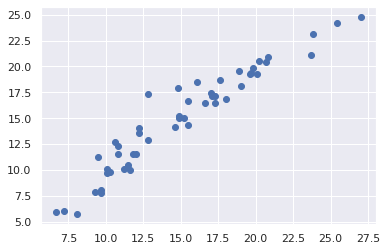

In [38]:
plt.scatter(y_test,y_pred)

In [39]:
adv_df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


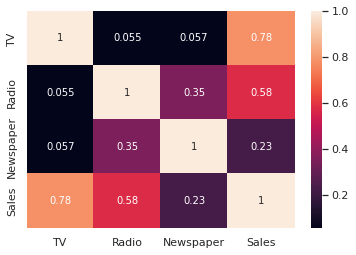

In [40]:
sns.heatmap(adv_df.corr(),annot=True)